In [3]:
# Initial imports

In [55]:
import panel as pn
pn.extension('plotly')
import numpy as np
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import csv
import plotly.graph_objects as go
import pandas as pd
import folium
from pathlib import Path
from dotenv import load_dotenv

ModuleNotFoundError: No module named 'folium'

In [8]:
#Import the CSVs to Pandas DataFrames

In [9]:
csvpath = Path("Resources/team_stats/psg_result.csv")
csvpath2 = Path("Resources/team_stats/win_table.csv")
csvpath3 = Path("Resources/team_stats/goal_diff_table.csv")
csvpath4 = Path("Resources/team_stats/points_total.csv")
csvpath5 = Path("Resources/team_stats/attendance.csv")
csvpath6 = Path("Resources/player_stats/player_sum_2.csv")
csvpath7 = Path("Resources/player_stats/psg_transfer_player_stats.csv")
csvpath8 = Path("Resources/player_stats/standard_stats_top_goal.csv")
csvpath9 = Path("Resources/transfer_data.csv")
csvpath10 = Path("Resources/psg_v_aang.csv")
csvpath11 = Path("Resources/cleaned_money_league_df.csv")
csvpath12 = Path("Resources/combined_transfer_fees.csv")

In [10]:
#For team perofrmance and section 1 around team data set, set the CSV paths 
psg_results = pd.read_csv(csvpath)
win_data = pd.read_csv(csvpath2)
goal_diff = pd.read_csv(csvpath3)
points_total = pd.read_csv(csvpath4)
attendance = pd.read_csv(csvpath5)

In [11]:
# Section 1 looks at team performance, bring in the data for various outputs that show clear, concise story
#Plot PSG wins
psg_wins = psg_results.hvplot.line(x="season", y="wins", rot=90, height=500, width=500)
psg_wins

:Curve   [season]   (wins)

In [12]:
#Bring in data for all teams in the comparison, begin to manipulate data by indexing season
win_data = win_data.set_index("season")
win_data

Paris S-G  Monaco  Saint-Étienne  Lille  Manchester City  \
season                                                                
2010-2011         15       9             12     21               21   
2011-2012         23       0             16     21               28   
2012-2013         25       0             16     16               23   
2013-2014         27      23             20     20               27   
2014-2015         24      20             19     16               24   
2015-2016         30      17             17     15               19   
2016-2017         27      30             12     13               23   
2017-2018         29      24             15     10               32   
2018-2019         29       8             19     22               32   

           Liverpool  Chelsea  Arsenal  Bayern Munich  Dortmund  Schalke 04  \
season                                                                        
2010-2011         17       21       19             19        23          11   
2011-2012         14       18       21             23        25          20   
2012-2013         16       22       21             29        19          16   
2013-2014         26       25       24             29        22          19   
2014-2015         18       26       22             25        13          13   
2015-2016         16       12       20             28        24          15   
2016-2017         22       30       23             25        18          11   
2017-2018         21       21       19             27        15          18   
2018-2019         30       21       21             24        23           8   

           Leverkusen  Juventus  Roma  Napoli  Fiorentina  Atlético Madrid  \
season                                                                       
2010-2011          20        15    18      21          12               17   
2011-2012          15        23    16      16          11               15   
2012-2013          19        27    18      23          21               23   
2013-2014          19        33    26      23          19               28   
2014-2015          17        26    19      18          18               23   
2015-2016          18        29    23      25          18               28   
2016-2017          11        29    28      26          16               23   
2017-2018          15        30    23      28          16               23   
2018-2019          18        28    18      24           8               26   

           Barcelona  Real Madrid  Athletic Club  
season                                            
2010-2011         30           29             18  
2011-2012         28           32             12  
2012-2013         32           26             12  
2013-2014         27           27             20  
2014-2015         30           30             15  
2015-2016         29           28             18  
2016-2017         28           29             19  
2017-2018         28           22             10  
2018-2019         26           21             13

In [13]:
#plot team win data
team_win_data = win_data.hvplot.line(x="season", y=["Paris S-G", "Monaco", "Saint-Étienne", "Lille"], 
                                     rot=90, height=750, width=1000)
team_win_data

:NdOverlay   [Variable]
   :Curve   [season]   (value)

In [14]:
# Calculate mean of wins across 10 seasons for PSG data, and all competitors, show in new table and add column
win_data["Mean"] = win_data.mean(axis=1, skipna=True)
psg_vs_avg = win_data[["Paris S-G", "Mean"]].copy()
psg_vs_avg

Paris S-G   Mean
season                     
2010-2011         15  18.40
2011-2012         23  18.85
2012-2013         25  20.20
2013-2014         27  24.20
2014-2015         24  20.80
2015-2016         30  21.45
2016-2017         27  22.15
2017-2018         29  21.30
2018-2019         29  20.95

In [15]:
#plot team wins vs. psg on hv plot
psg_vs_avg_plot = psg_vs_avg.hvplot.line(x="season", y=["Paris S-G", "Mean"], 
                                     rot=90, height=500, width=750,
                                     title = "Team wins per seasons versus competitors",
                                     value_label = "total wins",
                                     legend='top_left'
                                        )
psg_vs_avg_plot

:NdOverlay   [Variable]
   :Curve   [season]   (total wins)

In [16]:
# creatre goal difference table from data showing the goal differnetial that teams were able to accomplish over the four seasons
goal_diff_table = goal_diff.set_index("season")
goal_diff_table

Paris S-G  Monaco  Saint-Étienne  Lille  Manchester City  \
season                                                                
2010-2011         15     -19             -1     32               27   
2011-2012         34       0              4     33               64   
2012-2013         46       0             28     19               32   
2013-2014         61      40             22     20               65   
2014-2015         47      76             21      1               45   
2015-2016         83       7              5     12               30   
2016-2017         56      25             -1     -7               41   
2017-2018         79      32             -3    -26               79   
2018-2019         70      -4             18     35               72   

           Liverpool  Chelsea  Arsenal  Bayern Munich  Dortmund  ...  \
season                                                           ...   
2010-2011         15       36       29             41        45  ...   
2011-2012          7       19       25             55        55  ...   
2012-2013         28       36       35             80        39  ...   
2013-2014         51       44       27             71        42  ...   
2014-2015          4       41       35             62         5  ...   
2015-2016         13        6       29             63        48  ...   
2016-2017         36       52       33             67        32  ...   
2017-2018         46       24       23             64        17  ...   
2018-2019         67       24       22             56        37  ...   

           Leverkusen  Juventus  Roma  Napoli  Fiorentina  Atlético Madrid  \
season                                                                       
2010-2011          20        10     7      20           5                9   
2011-2012           8        48     6      20          -6                7   
2012-2013          26        47    15      37          28               34   
2013-2014          19        57    47      38          21               51   
2014-2015          25        48    23      16          15               38   
2015-2016          16        55    42      48          18               45   
2016-2017          -2        50    52      55           6               43   
2017-2018          14        62    33      48           8               36   
2018-2019          17        40    18      38           2               26   

           Barcelona  Real Madrid  Athletic Club  Unnamed: 21  
season                                                         
2010-2011         74           69              4          NaN  
2011-2012         85           89             -3          NaN  
2012-2013         75           61            -21          NaN  
2013-2014         67           66             27          NaN  
2014-2015         89           80              1          NaN  
2015-2016         83           76             13          NaN  
2016-2017         79           65             10          NaN  
2017-2018         70           50             -8          NaN  
2018-2019         54           17             -4          NaN  

[9 rows x 21 columns]

In [17]:
#Plot goal difference table
goal_diff_french = goal_diff_table.hvplot.line(x="season", y=["Paris S-G", "Monaco", "Saint-Étienne", "Lille"], 
                                     rot=90, height=750, width=1000)
goal_diff_french

:NdOverlay   [Variable]
   :Curve   [season]   (value)

In [18]:
#Capture goal difference table as PSG vs. mean of all teams by making a new table and adding a column for mean
goal_diff_table["Mean"] = goal_diff_table.mean(axis=1, skipna=True)
psg_vs_avg_gd = goal_diff_table[["Paris S-G", "Mean"]].copy()
psg_vs_avg_gd

Paris S-G   Mean
season                     
2010-2011         15  21.60
2011-2012         34  29.00
2012-2013         46  32.65
2013-2014         61  42.80
2014-2015         47  33.70
2015-2016         83  34.70
2016-2017         56  34.85
2017-2018         79  33.20
2018-2019         70  29.35

In [19]:
#Plot goal difference table
psg_vs_avg_gd_plot = psg_vs_avg_gd.hvplot.line(x="season", y=["Paris S-G", "Mean"], 
                                     rot=90, height=500, width=750,
                                     value_label='Goal Differential of PSG vs. Competitors Average',
                                     title = "Goal Differential",
                                     legend='top_left'
                                              ) 
psg_vs_avg_gd_plot

:NdOverlay   [Variable]
   :Curve   [season]   (Goal Differential of PSG vs. Competitors Average)

In [20]:
#Create table of total points for all teams across 10 seasons
total_points_data = points_total.set_index("season")
total_points_data 

Paris S-G  Monaco  Saint-Étienne  Lille  Manchester City  \
season                                                                
2010-2011         60      44             49     76               71   
2011-2012         79       0             57     74               89   
2012-2013         83       0             63     62               78   
2013-2014         89      80             69     71               86   
2014-2015         83      71             69     56               79   
2015-2016         96      65             58     60               66   
2016-2017         87      95             50     46               78   
2017-2018         93      80             55     38              100   
2018-2019         91      36             66     75               98   

           Liverpool  Chelsea  Arsenal  Bayern Munich  Dortmund  Schalke 04  \
season                                                                        
2010-2011         58       71       68             65        75          40   
2011-2012         52       64       70             73        81          64   
2012-2013         61       75       73             91        66          55   
2013-2014         84       82       79             90        71          64   
2014-2015         62       87       75             79        46          48   
2015-2016         60       50       71             88        78          52   
2016-2017         76       93       75             82        64          43   
2017-2018         75       70       63             84        55          63   
2018-2019         97       72       70             78        76          33   

           Leverkusen  Juventus  Roma  Napoli  Fiorentina  Atlético Madrid  \
season                                                                       
2010-2011          68        58    63      70          51               58   
2011-2012          54        84    56      61          46               56   
2012-2013          65        87    62      78          70               76   
2013-2014          61       102    85      78          65               90   
2014-2015          61        87    70      63          64               78   
2015-2016          60        91    80      82          64               88   
2016-2017          41        91    87      86          60               78   
2017-2018          55        95    77      91          57               79   
2018-2019          58        90    66      79          41               76   

           Barcelona  Real Madrid  Athletic Club  
season                                            
2010-2011         96           92             58  
2011-2012         91          100             49  
2012-2013        100           85             45  
2013-2014         87           87             70  
2014-2015         94           92             55  
2015-2016         91           90             62  
2016-2017         90           93             63  
2017-2018         93           76             43  
2018-2019         87           68             53

In [21]:
#create new table to show mean of total points of PSG, vs. mean of all other teams, add new column and create new table
total_points_data["Mean"] = total_points_data.mean(axis=1, skipna=True)
points_psg_vs_avg = total_points_data[["Paris S-G", "Mean"]].copy()
points_psg_vs_avg

Paris S-G   Mean
season                     
2010-2011         60  64.55
2011-2012         79  65.00
2012-2013         83  68.75
2013-2014         89  79.50
2014-2015         83  70.95
2015-2016         96  72.60
2016-2017         87  73.90
2017-2018         93  72.10
2018-2019         91  70.50

In [22]:
#plot psg vs. teams total point on graph using hv plot
points_psg_vs_avg_plot = points_psg_vs_avg.hvplot.line(x="season", y=["Paris S-G", "Mean"], 
                                     rot=90, height=500, width=750,
                                     value_label = "Total Points vs. Competitors Average",   
                                     title = "PSG total points against competitors",
                                     legend='top_left'
                                                      )
points_psg_vs_avg_plot 

:NdOverlay   [Variable]
   :Curve   [season]   (Total Points vs. Competitors Average)

In [23]:
#create table that shows attendance for all teams
attendance_top_teams = attendance.set_index("season")
attendance_top_teams

Paris S-G Monaco Saint-Étienne   Lille Manchester City Liverpool  \
season                                                                       
2010-2011    29,317  6,905        25,096  16,426          45,905    42,820   
2011-2012    42,891      0        21,533  16,972          47,045    44,253   
2012-2013    41,030      0        22,340  37,958          46,974    44,749   
2013-2014    45,420  8,438        30,595  38,662          47,075    44,671   
2014-2015    45,789  7,820        32,256  36,552          45,365    44,659   
2015-2016    46,160  7,838        30,328  30,268          54,041    43,910   
2016-2017    45,160  9,586        25,794  29,487          54,019    53,016   
2017-2018    46,929  9,243        28,142  31,453          54,070    53,049   
2018-2019    46,911  8,447        28,400  34,079          54,130    52,983   

          Chelsea Arsenal Bayern Munich Dortmund Schalke 04 Leverkusen  \
season                                                                   
2010-2011  41,435  60,025        69,000   79,151     61,320     28,633   
2011-2012  41,484  60,000        69,000   80,521     61,218     28,494   
2012-2013  41,462  60,079        71,000   80,520     61,171     28,120   
2013-2014  41,482  60,013        71,000   80,297     61,569     28,452   
2014-2015  41,546  59,992        72,882   80,424     61,569     29,311   
2015-2016  41,500  59,944        75,000   81,178     61,386     29,085   
2016-2017  41,508  59,957        75,000   79,653     60,703     28,428   
2017-2018  41,282  59,323        75,000   79,496     61,197     28,415   
2018-2019  40,437  59,899        75,000   80,841     60,941     27,990   

          Juventus    Roma  Napoli Fiorentina Atlético Madrid Barcelona  \
season                                                                    
2010-2011   21,966  33,952  45,608     23,608          41,526    79,268   
2011-2012   37,570  35,757  40,623     21,477          45,236    84,119   
2012-2013   38,600  40,179  39,636     25,665          40,868    77,973   
2013-2014   38,328  40,436  40,632     32,057          46,247    72,116   
2014-2015   38,553  40,135  32,266     30,309          46,532    77,632   
2015-2016   38,662  35,182  38,760     28,734          47,113    79,724   
2016-2017   39,936  32,638  36,601     26,470          44,710    78,034   
2017-2018   39,316  37,450  43,050     26,092          55,483    66,603   
2018-2019   37,799  38,622  29,003     31,178          56,216    76,104   

          Real Madrid Athletic Club  
season                               
2010-2011      71,289        36,042  
2011-2012      74,836        37,605  
2012-2013      68,526        30,737  
2013-2014      71,558        32,851  
2014-2015      73,918        41,137  
2015-2016      71,280        41,945  
2016-2017      69,426        41,042  
2017-2018      66,161        37,325  
2018-2019      61,040        40,664

In [24]:
#show PSG team attendance in table
attendance_top_teams_table = attendance_top_teams[["Paris S-G"]].copy()
attendance_top_teams_table

Paris S-G
season             
2010-2011    29,317
2011-2012    42,891
2012-2013    41,030
2013-2014    45,420
2014-2015    45,789
2015-2016    46,160
2016-2017    45,160
2017-2018    46,929
2018-2019    46,911

In [25]:
#Plot PSG attendance
attendance_top_teams_table_plot = attendance_top_teams_table.hvplot.scatter(x="season", y="Paris S-G", 
                                     rot=90, height=500, width=500,                       
                                     value_label = "attendance",   
                                     title = "PSG attendance",  
                                     ) 
attendance_top_teams_table_plot

:Scatter   [season]   (Paris S-G)

In [26]:
# Import data of player transfers
transfers_data = pd.read_csv(csvpath9, index_col="season")
transfers_data.head()

name  transfer_fee               team_from  from_lat  \
season                                                                      
2013-2014   Mamadou Sakho      19000000                Paris SG   48.8414   
2013-2014   Kevin Gameiro       7500000                Paris SG   48.8414   
2013-2014  Edinson Cavani      64500000            S.S.C Napoli   40.8279   
2013-2014      Marquinhos      31400000               A.S. Roma   41.9341   
2013-2014    Yohan Cabaye      25000000  Newcastle United F.C.    54.9756   

           from_long         team_to   to_lat  to_long  league  
season                                                          
2013-2014     2.2530  Liverpool F.C.  53.4308  -2.9608  French  
2013-2014     2.2530      Sevilla FC  37.3841  -5.9707  French  
2013-2014    14.1931        Paris SG  48.8414   2.2530  French  
2013-2014    12.4547        Paris SG  48.8414   2.2530  French  
2013-2014    -1.6217        Paris SG  48.8414   2.2530  French

In [27]:
# Section 2, generations of maps for transfer players, and titles 
#generate map using 2013-2014 transfers for all players

fig = go.Figure()

for i in range(len(transfers_data)): 
    
    line_color = []
    
    if transfers_data['league'].iloc[i] == transfers_data['league'].iloc[0]:
        line_color = 'red'
    elif transfers_data['league'].iloc[i] == transfers_data['league'].iloc[22]:
        line_color = 'blue'
    elif transfers_data['league'].iloc[i] == transfers_data['league'].iloc[39]:
        line_color = 'green'
    elif transfers_data['league'].iloc[i] == transfers_data['league'].iloc[67]:
        line_color = 'orange'
    elif transfers_data['league'].iloc[i] == transfers_data['league'].iloc[88]:
        line_color = 'purple'
        
    fig.add_trace(go.Scattergeo(
    lon = [transfers_data['from_long'].iloc[i], transfers_data['to_long'].iloc[i]],
    lat = [transfers_data['from_lat'].iloc[i], transfers_data['to_lat'].iloc[i]],   
    mode = 'lines',
    line = dict(width = 2, color = line_color),
    opacity = 0.5
        )
    )

fig.add_trace(go.Scattergeo(
    lon = transfers_data['from_long'],
    lat = transfers_data['from_lat'],
    hoverinfo = 'text',
    text = transfers_data['team_from'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.add_trace(go.Scattergeo(
    lon = transfers_data['to_long'],
    lat = transfers_data['to_lat'],
    hoverinfo = 'text',
    text = transfers_data['team_to'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.update_layout(
    title_text = 'Season 2013-2014 Player Transfers <br> (Hover For Team Name)',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'world',
        projection_type = 'natural earth',
        showland = True,
        landcolor = 'rgb(250, 245, 245)',
        countrycolor = 'rgb(204, 204, 330)',
    ),
    height=1500,
    width =1500
)
#fig.show()

In [28]:
# Generate Map showing teams of focus
# Create a vizualization to analyze top 4 teams in each major European league for the 2013-2014 season
#(French, English, Italian, Spanish, & German)

m = folium.Map(location=[48.5260, 10.2551], zoom_start=5)

NameError: name 'folium' is not defined

In [29]:
# Plot Top 4 Teams in French League for 2013-2014 season

tooltip = "Paris Saint-Germain F.C."
folium.Marker(location=[48.8414, 2.2530],popup='<i> Le Parc des Princes </i>', tooltip=tooltip, icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

tooltip = "Olympique Lyonnais (Lyon)"
folium.Marker(location=[45.7653, 4.9820],popup='<i> Parc Olympique Lyonnais (Groupama) </i>', tooltip=tooltip, icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

tooltip = "AS Monaco FC"
folium.Marker(location=[43.7276, 7.4157],popup='<i>  Stade Louis-II </i>', tooltip=tooltip, icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

tooltip = "Olympique de Marseille (Marseille)"
folium.Marker(location=[43.2698, 5.3959],popup='<i> Stade Vélodrome </i>', tooltip=tooltip, icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

NameError: name 'folium' is not defined

In [30]:
# Plot Top 4 Teams in English League for 2013-2014 season
tooltip = "Manchester United F.C."
folium.Marker(location=[53.4631, -2.2913],popup='<i> Old Trafford </i>', tooltip=tooltip, icon=folium.Icon(color='darkblue', icon='info-sign')).add_to(m)

tooltip = "Manchester City F.C."
folium.Marker(location=[53.4831, -2.2004],popup='<i> Etihad </i>', tooltip=tooltip, icon=folium.Icon(color='darkblue', icon='info-sign')).add_to(m)

tooltip = "Arsenal F.C."
folium.Marker(location=[51.5549, 0.1084],popup='<i> Emirates </i>', tooltip=tooltip, icon=folium.Icon(color='darkblue', icon='info-sign')).add_to(m)

tooltip = "Chelsea F.C."
folium.Marker(location=[51.4817, -0.1910],popup='<i> Stamford Bridge  </i>', tooltip=tooltip, icon=folium.Icon(color='darkblue', icon='info-sign')).add_to(m)

NameError: name 'folium' is not defined

In [31]:
# Plot Top 4 Teams in Spanish League for 2013-2014 season
tooltip = "FC Barcelona"
folium.Marker([41.3809, 2.1228], popup='<i> Camp Nou</i>', tooltip=tooltip, icon=folium.Icon(color='orange', icon='info-sign')).add_to(m)

tooltip = "Real Madrid C.F."
folium.Marker([40.4530, -3.6883], popup='<i>Santiago Bernabeu </i>', tooltip=tooltip, icon=folium.Icon(color='orange', icon='info-sign')).add_to(m)

tooltip = "Atletico Madrid"
folium.Marker([40.4362, -3.5995], popup='<i> Wanda Metropolitano </i>', tooltip=tooltip, icon=folium.Icon(color='orange', icon='info-sign')).add_to(m)

tooltip = "Valencia CF"
folium.Marker([39.4747, -0.3586], popup='<i> Mestalla </i>', tooltip=tooltip, icon=folium.Icon(color='orange', icon='info-sign')).add_to(m)

NameError: name 'folium' is not defined

In [32]:
# Plot Top 4 Teams in German League for 2013-2014 season
tooltip = "FC Bayern Munich"
folium.Marker(location=[48.2188, 11.6248],popup='<i> Allianz Arena </i>', tooltip=tooltip, icon=folium.Icon(color='purple', icon='info-sign')).add_to(m)

tooltip = "VfL Wolfsburg"
folium.Marker(location=[52.4327, 10.8039],popup='<i> Volkswagen Arena </i>', tooltip=tooltip, icon=folium.Icon(color='purple', icon='info-sign')).add_to(m)

tooltip = "Borussia Monchengladbach (M'Gladbach)"
folium.Marker(location=[51.1746, 6.3855],popup='<i> Borussia-Park </i>', tooltip=tooltip, icon=folium.Icon(color='purple', icon='info-sign')).add_to(m)

tooltip = "Bayer 04 Leverkusen"
folium.Marker(location=[51.0382, 7.0023],popup='<i> BayArena </i>', tooltip=tooltip, icon=folium.Icon(color='purple', icon='info-sign')).add_to(m)

NameError: name 'folium' is not defined

In [33]:
# Plot Top 4 Teams in Italian League for 2013-2014 season
tooltip = "Juventus F.C"
folium.Marker(location=[45.1096, 7.6412],popup='<i> Allianz Stadium </i>', tooltip=tooltip, icon=folium.Icon(color='green', icon='info-sign')).add_to(m)

tooltip = "A.S. Roma & SS Lazio"
folium.Marker(location=[41.9341, 12.4547],popup='<i> Stadio Olimpico </i>', tooltip=tooltip, icon=folium.Icon(color='green', icon='info-sign')).add_to(m)

tooltip = "ACF Fiorentina"
folium.Marker(location=[43.7808, 11.2826],popup='<i> Stadio Artemio Franchi </i>', tooltip=tooltip, icon=folium.Icon(color='green', icon='info-sign')).add_to(m)

NameError: name 'folium' is not defined

In [34]:
# Show Map 
m

NameError: name 'm' is not defined

In [35]:
#Section 3, look at player perofrmance by position
#create table to look at player performance
standard_stats = pd.read_csv(csvpath8, encoding = "ISO-8859-1", engine='python')
standard_stats.head()

player   nation pos            squad    born  mp  starts   min  \
0        Aaron Ramsey  wal WAL  MF          Arsenal  1990.0   7       5   354   
1         Abdul Razak   ci CIV  MF  Manchester City  1992.0   1       0     1   
2          Abou Diaby   fr FRA  MF          Arsenal  1986.0  16      13   954   
3        Adam Johnson  eng ENG  MF  Manchester City  1987.0  31      15  1542   
4  Aleksandar Kolarov   rs SRB  DF  Manchester City  1985.0  24      20  1720   

   gls  ast  pk  pkatt  crdy  crdr  gls_per_90  ast_per_90  g_plus_a_per_90  \
0    1  0.0   0    0.0     1     0        0.25        0.00             0.25   
1    0  0.0   0    0.0     0     0        0.00        0.00             0.00   
2    2  2.0   0    0.0     1     1        0.19        0.19             0.38   
3    4  4.0   0    0.0     2     0        0.23        0.23             0.47   
4    1  1.0   0    0.0     6     1        0.05        0.05             0.10   

   g_minus_pk_per_90  year   league  
0               0.25  2010  English  
1               0.00  2010  English  
2               0.19  2010  English  
3               0.23  2010  English  
4               0.05  2010  English

In [36]:
#clean data
standard_stats = standard_stats.drop(columns=['born', 'mp', 'starts', 'min'])
standard_stats.head()

player   nation pos            squad  gls  ast  pk  pkatt  \
0        Aaron Ramsey  wal WAL  MF          Arsenal    1  0.0   0    0.0   
1         Abdul Razak   ci CIV  MF  Manchester City    0  0.0   0    0.0   
2          Abou Diaby   fr FRA  MF          Arsenal    2  2.0   0    0.0   
3        Adam Johnson  eng ENG  MF  Manchester City    4  4.0   0    0.0   
4  Aleksandar Kolarov   rs SRB  DF  Manchester City    1  1.0   0    0.0   

   crdy  crdr  gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  \
0     1     0        0.25        0.00             0.25               0.25   
1     0     0        0.00        0.00             0.00               0.00   
2     1     1        0.19        0.19             0.38               0.19   
3     2     0        0.23        0.23             0.47               0.23   
4     6     1        0.05        0.05             0.10               0.05   

   year   league  
0  2010  English  
1  2010  English  
2  2010  English  
3  2010  English  
4  2010  English

In [37]:
#groupby
standard_stats_sq = standard_stats.groupby(['squad', 'year']).sum()
standard_stats_sq.head()

gls   ast  pk  pkatt  crdy  crdr  gls_per_90  ast_per_90  \
squad   year                                                             
Arsenal 2010   59  43.0   4    7.0    61     5        3.29        2.25   
        2011   59  48.0   2    3.0    59     4        4.02        2.36   
        2012   55  41.0   5    6.0    34     4        2.60        2.01   
        2013   60  40.0   3    3.0    46     4        4.17        2.03   
        2014   58  42.0   6    7.0    62     2        2.68        1.94   

              g_plus_a_per_90  g_minus_pk_per_90  
squad   year                                      
Arsenal 2010             5.52               3.10  
        2011             6.41               3.97  
        2012             4.62               2.45  
        2013             6.20               4.07  
        2014             4.61               2.50

In [38]:
#plot-gls
def make_plot(stats):

    varstring = stats
    fig, ax = plt.subplots(figsize=(10,15))
    standard_stats.groupby(['year', 'squad']).sum()[varstring].unstack().plot(ax=ax)
    for line in ax.get_lines():
        if line.get_label() == 'Paris S-G':
            line.set_linewidth(10)
    plt.show()
    
    

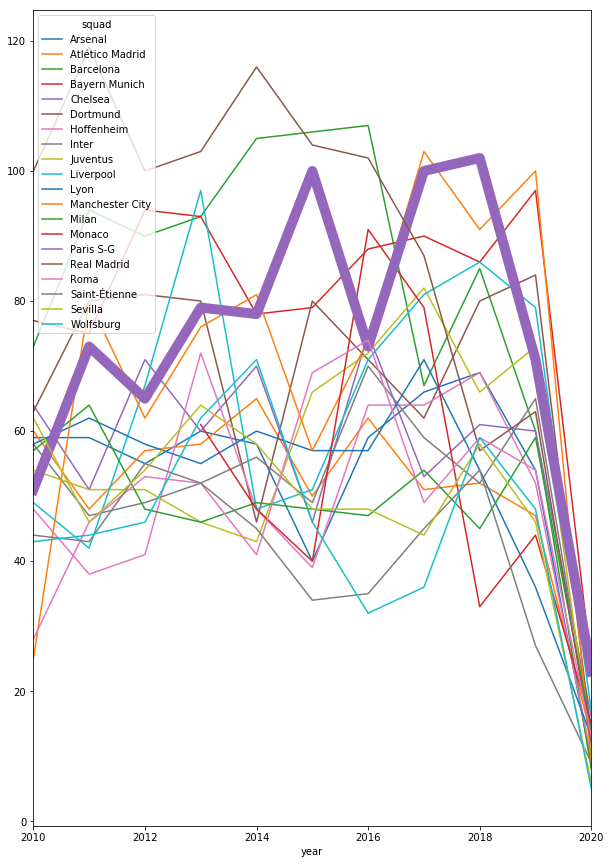

In [39]:
#plot
make_plot('gls')

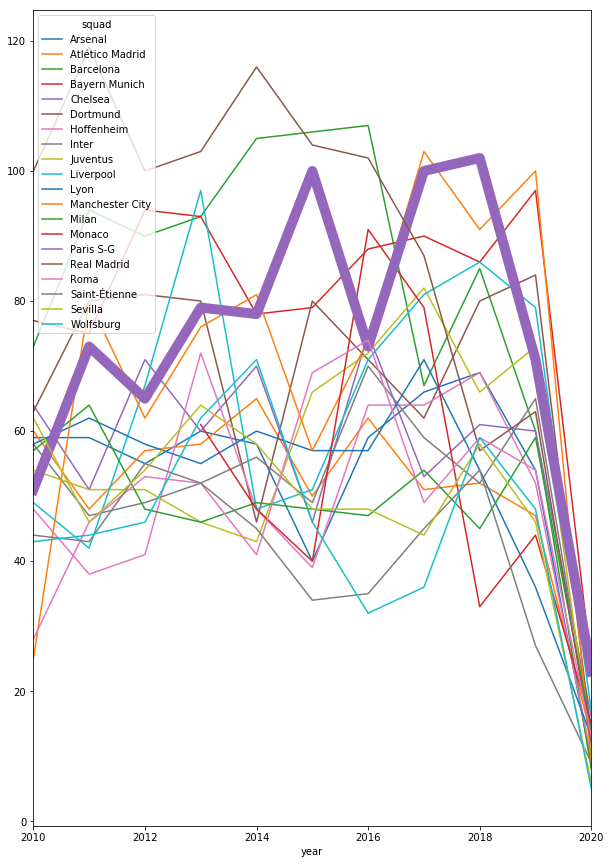

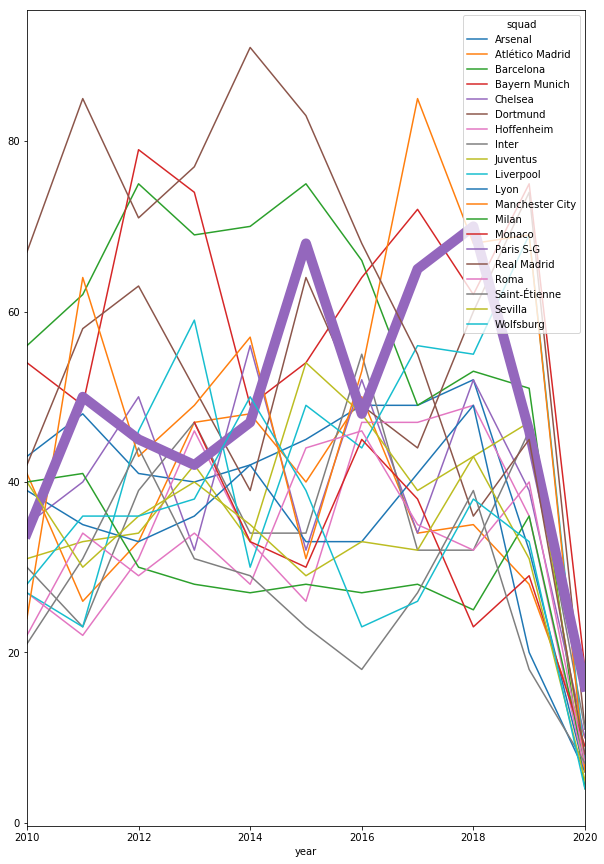

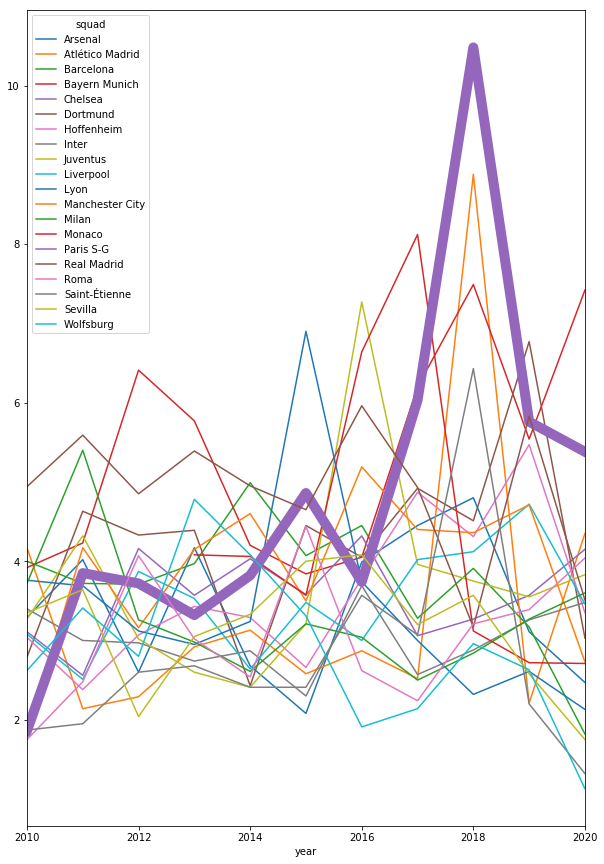

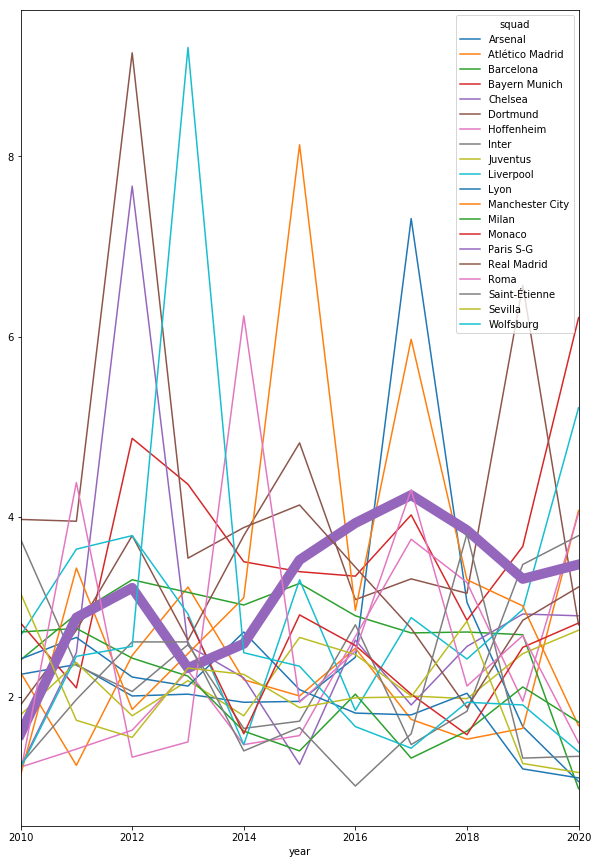

In [40]:
#tabs
gls = pn.Row(make_plot('gls'))
ast = pn.Row(make_plot('ast'))
gls_per_90 = pn.Row(make_plot('gls_per_90'))
ast_per_90 = pn.Row(make_plot('ast_per_90'))
plots_as_column = pn.Column(
   "Top Team Stat Comparison", gls, ast, gls_per_90, ast_per_90
)

In [41]:
# tabs3 = pn.Tabs(
#   ("All Comparison", plots_as_column),
#   ("Top Teams Goal Comparison", gls),
#   ("Top Teams Assists Comparison", ast),
#   ("Top Teams Goals per 90 min Comparison", gls_per_90),
#   ("Top Teams Assists per 90 min Comparison", ast_per_90)
#)
#tabs3

In [42]:
transfer_stats = pd.read_csv(csvpath7, encoding = "ISO-8859-1", engine='python')
transfer_stats.tail()

player      squad  mp  starts   min  gls  ast  pk  pkatt  crdy  crdr  \
121  Maxwell  Paris S-G  33      33  2933    2    3   0      0     2     0   
122  Maxwell  Paris S-G  24      23  2090    3    2   0      0     2     0   
123  Maxwell  Paris S-G  26      24  2164    3    3   0      0     1     0   
124  Maxwell  Paris S-G  28      24  2226    3    3   0      0     0     0   
125  Maxwell  Paris S-G  20      19  1713    0    6   0      0     0     0   

     gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  year  league  \
121        0.06        0.09             0.15               0.06  2012  French   
122        0.13        0.09             0.22               0.13  2013  French   
123        0.12        0.12             0.25               0.12  2014  French   
124        0.12        0.12             0.24               0.12  2015  French   
125        0.00        0.32             0.32               0.00  2016  French   

     transfer fee  
121       3500000  
122       3500000  
123       3500000  
124       3500000  
125       3500000

In [43]:
# data cleanup
transfer_stats = transfer_stats.drop(columns=['transfer fee'])
transfer_stats = transfer_stats.drop(columns=['year'])
transfer_stats['player'] = transfer_stats['player'].astype('str')
transfer_stats = transfer_stats.sort_index()
transfer_stats.head()

player      squad  mp  starts   min  gls  ast  pk  pkatt  crdy  \
0         Neymar  Paris S-G  20      20  1797   19   13   4      4     5   
1         Neymar  Paris S-G  17      16  1439   15    7   5      5     2   
2         Neymar  Paris S-G  15      15  1318   13    6   4      5     4   
3         Neymar  Paris S-G   4       4   359    2    3   0      0     1   
4  Kylian Mbappé  Paris S-G  27      24  2095   13    9   0      0     2   

   crdr  gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  league  
0     2        0.95        0.65             1.60               0.75  French  
1     0        0.94        0.44             1.38               0.63  French  
2     1        0.89        0.41             1.30               0.61  French  
3     1        0.50        0.75             1.25               0.50  French  
4     0        0.56        0.39             0.95               0.56  French

In [44]:
#position = transfer_stats.get_value('player','pos_num', takeable=False)
player_stats = transfer_stats.groupby('player').sum()
player_stats

mp  starts    min  gls  ast  pk  pkatt  crdy  crdr  \
player                                                                      
Alex                   70      67   5952    6    1   0      0    10     0   
Blaise Matuidi        203     161  14542   23   14   0      0    24     1   
David Luiz             56      52   4620    3    2   0      0    10     0   
Edinson Cavani        200     171  15058  138   23  20     25    19     1   
Ezequiel Lavezzi      107      71   6061   22    5   0      0     7     1   
Giovani Lo Celso       38      19   1869    4    2   0      0     3     0   
Gonçalo Guedes          8       1    148    0    1   0      0     0     0   
Gregory van der Wiel   89      79   7096    4   11   0      0    14     1   
Grzegorz Krychowiak    11       7    659    0    0   0      0     2     0   
Javier Pastore        186     143  12516   29   43   0      0    15     0   
Jesé                   12       1    293    1    0   1      1     0     0   
Julian Draxler         95      65   5844   13   17   0      0    16     0   
Jérémy Ménez           79      64   5422   14   20   0      0    19     0   
Kylian Mbappé          82      70   6383   71   25   3      4     7     1   
Kévin Gameiro          59      34   3150   19    3   1      1     1     0   
Layvin Kurzawa         90      72   6502    9    9   0      0    13     1   
Lucas Digne            30      29   2606    0    2   0      0     4     0   
Lucas Moura           153     104   9378   34   30   4      4     9     0   
Marco Verratti          5       4    354    0    0   0      0     1     0   
Marquinhos            185     160  14843   15    4   0      0    12     1   
Maxwell               145     136  12249   12   17   0      0     5     0   
Mohamed Sissoko        25      22   1811    2    1   0      0     8     2   
Nenê                   79      75   6606   36   24  10     10    10     0   
Neymar                 56      55   4913   49   29  13     14    12     4   
Salvatore Sirigu      109     109   9752    0    0   0      0     3     0   
Serge Aurier           57      54   4851    2   10   0      0    14     2   
Thiago Motta          166     146  12466    8    9   0      0    42     4   
Thiago Silva          125     122  10453    5    2   0      0    12     0   
Yohan Cabaye           39      22   1787    1    3   0      0     9     1   
Yuri Berchiche         22      19   1715    2    3   0      0     4     0   
Zlatan Ibrahimovic    122     117  10292  113   37  24     27    20     1   
Ángel Di María        148     131  10925   48   58   1      2     7     1   

                      gls_per_90  ast_per_90  g_plus_a_per_90  \
player                                                          
Alex                        0.30        0.07             0.37   
Blaise Matuidi              0.84        0.56             1.42   
David Luiz                  0.12        0.09             0.21   
Edinson Cavani              5.60        1.01             6.60   
Ezequiel Lavezzi            1.41        0.24             1.64   
Giovani Lo Celso            0.20        0.10             0.30   
Gonçalo Guedes              0.00        0.63             0.63   
Gregory van der Wiel        0.23        0.56             0.80   
Grzegorz Krychowiak         0.00        0.00             0.00   
Javier Pastore              1.29        2.36             3.65   
Jesé                        0.34        0.00             0.34   
Julian Draxler              1.15        1.18             2.33   
Jérémy Ménez                0.71        0.84             1.55   
Kylian Mbappé               4.36        1.79             6.15   
Kévin Gameiro               1.26        0.18             1.43   
Layvin Kurzawa              0.63        0.62             1.24   
Lucas Digne                 0.00        0.14             0.14   
Lucas Moura                 2.54        2.67             5.22   
Marco Verratti              0.00        0.00             0.00   
Marquinhos                  0.85       

In [45]:
#csvpath3 = Path("C:/Users/jwber/project_one/Resources/player_stats/player_sum_2.csv")
psg_player_stats = pd.read_csv(csvpath6, encoding = "ISO-8859-1", engine='python')
psg_player_stats.set_index(psg_player_stats['player'], inplace=True)
psg_player_stats = psg_player_stats.drop(columns=['player'])
psg_player_stats.head()

mp  starts    min  gls  ast  pk  pkatt  crdy  crdr  \
player                                                                
Ángel Di María  148     131  10925   48   58   1      2     7     1   
Alex             70      67   5952    6    1   0      0    10     0   
Blaise Matuidi  203     161  14542   23   14   0      0    24     1   
David Luiz       56      52   4620    3    2   0      0    10     0   
Edinson Cavani  200     171  15058  138   23  20     25    19     1   

                gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  \
player                                                                       
Ángel Di María        2.25        2.70             4.95               2.21   
Alex                  0.30        0.07             0.37               0.30   
Blaise Matuidi        0.84        0.56             1.42               0.84   
David Luiz            0.12        0.09             0.21               0.12   
Edinson Cavani        5.60        1.01             6.60               4.72   

                num_seasons  transfer_fee pos  pos_num  
player                                                  
Ángel Di María            6      63000000  FW        1  
Alex                      3       5000000  DF        1  
Blaise Matuidi            7       8000000  MF        1  
David Luiz                3      49500000  DF        2  
Edinson Cavani            7      64500000  FW        1

In [46]:
# Slice by position
fw_sts = psg_player_stats[
    psg_player_stats['pos'] == 'FW'
]

mf_sts = psg_player_stats[
    psg_player_stats['pos'] == 'MF'
]

df_sts = psg_player_stats[
    psg_player_stats['pos'] == 'DF'
]

In [47]:
#forward transfer cost
fw_transfer = (fw_sts.iloc[:, 14]) 
fw_transfer_comparison = fw_transfer.hvplot.bar(title='Forward Transfer Cost', rot=90, figsize=(10,10))

In [48]:
#forward production
fw_prod = fw_sts.iloc[:, 3] + fw_sts.iloc[:, 4]
fw_prod_comparison = fw_prod.hvplot.bar(title='Forward Goals and Assists', rot=90, figsize=(10,10))

In [49]:
#midfield transfer
mf_transfer = mf_sts.iloc[:, 14]
mf_transfer_comparison = mf_transfer.hvplot.bar(title='Midfield Transfer Cost', rot=90, figsize=(10,10))

In [50]:
#midfield production
mf_prod = mf_sts.iloc[:, 3] + mf_sts.iloc[:, 4]
mf_prod_comparison = mf_prod.hvplot.bar(title='Midfield Goals and Assists', rot=90, figsize=(10,10))

In [51]:
# Transfer comparison
mf_vs_fw_cost = mf_transfer.hvplot.bar(label='Midfield Transfer Cost',rot=90) * fw_transfer.hvplot.bar(label='Forward Transfer Cost', rot=90)

In [52]:
#production comparison
mf_vs_fw_prod = mf_prod.hvplot.bar(label='Midfield G and A',rot=90) * fw_prod.hvplot.bar(label='Forward G and A',rot=90)

In [53]:
# Section 4 analysis of investment in psg vs. investment in stock
def psg_v_stock():
    psg_v_aang = pd.read_csv(psg_v_aang_file_path,index_col='Year')
    psg_v_stock_plot = go.Figure()
    for column in psg_v_aang.columns.to_list():
        psg_v_stock_plot.add_trace(
        go.Scatter(
            x = psg_v_aang.index,
            y = psg_v_aang[column],
            name = column))
    psg_v_stock_plot.update_layout(title="Should the Emir of Qatar have Purchased the Soccer Club or Just Season Tickets", xaxis_title="Year",
    yaxis_title="Return on Investment (in millions)",
    legend_title="Assets",
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True, True, True]},
                          {'title': 'Should the Emir of Qatar have Purchased the Soccer Club or Just Season Tickets',
                           'showlegend':True}]),
            dict(label = 'Paris Saint-Germain vs. AAPL',
                  method = 'update',
                  args = [{'visible': [True, True, False, False, False]},
                          {'title': 'Should the Emir of Qatar have Purchased the Soccer Club or Just Season Tickets',
                           'showlegend':True}]),
             dict(label = 'Paris Saint-Germain vs. AMZN',
                  method = 'update',
                  args = [{'visible': [True, False,True, False, False]},
                          {'title': 'Should the Emir of Qatar have Purchased the Soccer Club or Just Season Tickets',
                           'showlegend':True}]),
             dict(label = 'Paris Saint-Germain vs. NFLX',
                  method = 'update',
                  args = [{'visible': [True, False, False,True, False]},
                          {'title': 'Should the Emir of Qatar have Purchased the Soccer Club or Just Season Tickets',
                           'showlegend':True}]),
             dict(label = 'Paris Saint-Germain vs. GOOG',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, True]},
                          {'title': 'Should the Emir of Qatar have Purchased the Soccer Club or Just Season Tickets',
                           'showlegend':True}]),
            ])
        )
                   ])
    psg_v_stock_panel = pn.panel(psg_v_stock_plot)
    return psg_v_stock_panel


In [54]:
# Section 5 analysis of transfer fees vs. revenue

def transfer_fees_v_revenue():
    
    paris_revenue_plot = money_league["Paris Saint-Germain"].hvplot.area(ylabel = "in millions", label= "Revenue", title = "Paris Saint-Germain", frame_height = 400, frame_width = 600,color = "crimson")
    paris_fee_plot = transfer_fee["Paris SG"].hvplot.area(label = "Transfer Fees Paid", title = "Paris Saint-Germain", frame_height = 400, frame_width = 600,color = "darkblue")
    psg_plot = paris_revenue_plot * paris_fee_plot
    psg_final_plot = psg_plot.opts(legend_position='top_left')

    real_madrid_revenue_plot = money_league["Real Madrid"].hvplot.area(ylabel = "in millions", label= "Revenue", title = "Real Madrid", frame_height = 400, frame_width = 600, color="gold")
    real_madrid_fee_plot = transfer_fee["Real Madrid"].hvplot.area(label = "Transfer Fees Paid", title = "Real Madrid", frame_height = 400, frame_width = 600, color="indigo")
    real_madrid_plot = real_madrid_revenue_plot * real_madrid_fee_plot
    real_madrid_final_plot = real_madrid_plot.opts(legend_position='top_left')
    
    chelsea_revenue_plot = money_league["Chelsea"].hvplot.area(ylabel = "in millions", label= "Revenue", title = "Chelsea", frame_height = 400, frame_width = 600, color="darkblue")
    chelsea_fee_plot = transfer_fee["Chelsea"].hvplot.area(label = "Transfer Fees Paid", title = "Chelsea", frame_height = 400, frame_width = 600, color="white")
    chelsea_plot = chelsea_revenue_plot * chelsea_fee_plot
    chelsea_final_plot = chelsea_plot.opts(legend_position='top_left')
    
    schalke_revenue_plot = money_league["Schalke 04"].hvplot.area(ylabel = "in millions", label= "Revenue", title = "FC Schalke 04", frame_height = 400, frame_width = 600, color="blue")
    schalke_fee_plot = transfer_fee["FC Schalke 04"].hvplot.area(label = "Transfer Fees Paid", title = "FC Schalke 04", frame_height = 400, frame_width = 600, color="lightblue")
    schalke_plot = schalke_revenue_plot * schalke_fee_plot
    schalke_final_plot = schalke_plot.opts(legend_position='top_left')
    
    milan_revenue_plot = money_league["AC Milan"].hvplot.area(ylabel = "in millions", label= "Revenue", title = "AC Milan", frame_height = 400, frame_width = 600, color="red")
    milan_fee_plot = transfer_fee["AC Milan"].hvplot.area(label = "Transfer Fees Paid", title = "AC Milan", frame_height = 400, frame_width = 600, color="black")
    milan_plot = milan_revenue_plot * milan_fee_plot
    milan_final_plot = milan_plot.opts(legend_position='top_left')
    
    combined_plots = psg_final_plot + real_madrid_final_plot + chelsea_final_plot + schalke_final_plot + milan_final_plot
    
    fees_v_revenue_panel = pn.panel(combined_plots)
    return fees_v_revenue_panel

In [41]:
#paneling player peformance for seed into main panel

row_fw = pn.Row(fw_transfer_comparison)
row_fw.append(fw_prod_comparison)
row_mf = pn.Row(mf_transfer_comparison)
row_mf.append(mf_prod_comparison)
row_fw_vs_mf = pn.Row(mf_vs_fw_cost)
row_fw_vs_mf.append(mf_vs_fw_prod)

column = pn.Column('# Player Cost Beneft Analysis By Player and Position',row_fw, row_mf, row_fw_vs_mf)

tabs1 = pn.Tabs(
    ("All Plots", column),
    ("Forward Cost and Production", row_fw),
    ("Midfield Cost and Production", row_mf),
    ("Forward Vs. Midfield Cost and Production", row_fw_vs_mf)
)



NameError: name 'fw_transfer_comparison' is not defined

In [42]:
# create panel by relevant sections

row_of_charts = pn.Row(points_psg_vs_avg_plot, psg_vs_avg_plot)
row_of_charts_one = pn.Row(psg_vs_avg_gd_plot) 
row_of_charts_two = pn.Row(attendance_top_teams_table_plot)
row_of_charts_three = pn.Row(fig.show())



team_title = pn.Column(
m
)

transfer_market_column = pn.Column(
        row_of_charts_three
)

player_information_column = pn.Column(
    tabs1,
)

team_performance_column = pn.Column(
    "## Team Performance", 
    "Across European Soccer leagues, the winner of a given league is the team that collects the most points after playing a season (38 games) against "
    "it's competitors.  Three points are awarded for a wine, one point for a draw, and none for a defeat, with the team with the most ponts "
    "at the end of the season winning the league title. Using the 2013-2014 top 4 finishers as a becnhmark across five leagues, the below graph " 
    "is PSG's total points versus the top 4 competitors in each of the English, French, Spanish, German and Italian leagues.  PSG has over performed "    
    "its competitors since 2011. 2011 marked the first year after ownership of PSG changed hands and large scale investment in the transfer market begun. "
    "Looking at the data, you can see a consistent and accelerating uptick in the amount of points that PSG is winning.  Interestingly, PSG peers seem to have up "
    "and down seasons where PSG has been able to maintain a steady top level of performance",
    row_of_charts,
    "## Goal Differential",
    "Goal differential data is an important indicator of how well a team is performing. A team that is able to limit it's opponents goals by having "
    "strong defense and goalkeeping that is also able to pass and score more effectively have a significantly better chance of winning more games, "
    "and drawing more games against close competitors.  Generally, PSG is winning it's games by a lot larger margins than what its peers are doing. "
    "This demonstrates that the team that the team that PSG has put together is significantly more competitive and productive than the rest", 
    row_of_charts_one,    
    "##Attendance",
    "Interesting to note the increase in attendance of fans at home stadium in Paris as the team begins to perform better. This is an indicator of "
    "increased revenue for the team which it can funnel back into developing and transferring more high quality players",
    row_of_charts_two,    
)

analysis_column = pn.Column(
# Insert comparison and analysis

)

team_performance_dashboard = pn.Tabs(
    ("Team Focus", team_title), ("Transfer Market Information", transfer_market_column), ("Player Performance", player_information_column), ("Team Performance", team_performance_column),
    ("Analysis", analysis_column)
)


NameError: name 'points_psg_vs_avg_plot' is not defined

In [43]:
team_performance_dashboard

NameError: name 'team_performance_dashboard' is not defined